**Project Title: EDA on McDonald's Menu Data**

**Objective**: Explore nutritional data to uncover trends and insights for better decision-making.

Step 1: Import Libraries and Load Dataset

In [54]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
# Load the dataset
df = pd.read_csv("/content/menu.csv")

In [56]:
# Identifying the rows and columns
df.shape

(260, 24)

In [57]:
# Preview the first few rows
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


Step 2: Data Cleaning & Column Formatting

In [58]:
# Check for missing values
df.isnull().sum()

,0
Category,0
Item,0
Serving Size,0
Calories,0
Calories from Fat,0
Total Fat,0
Total Fat (% Daily Value),0
Saturated Fat,0
Saturated Fat (% Daily Value),0
Trans Fat,0


In [59]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [60]:
# Clean column names
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.columns

Index(['Category', 'Item', 'Serving_Size', 'Calories', 'Calories_from_Fat',
       'Total_Fat', 'Total_Fat_%_Daily_Value', 'Saturated_Fat',
       'Saturated_Fat_%_Daily_Value', 'Trans_Fat', 'Cholesterol',
       'Cholesterol_%_Daily_Value', 'Sodium', 'Sodium_%_Daily_Value',
       'Carbohydrates', 'Carbohydrates_%_Daily_Value', 'Dietary_Fiber',
       'Dietary_Fiber_%_Daily_Value', 'Sugars', 'Protein',
       'Vitamin_A_%_Daily_Value', 'Vitamin_C_%_Daily_Value',
       'Calcium_%_Daily_Value', 'Iron_%_Daily_Value'],
      dtype='object')

In [61]:
print("Total Items:", df.shape[0])
print("Unique Categories:", df.Category.nunique())
print("Avg Sugar per Item:", df.Sugars.mean())

Total Items: 260
Unique Categories: 9
Avg Sugar per Item: 29.423076923076923


Step 3: Descriptive Statistics

In [62]:
# Summary statistics
df.describe()

,Calories,Calories_from_Fat,Total_Fat,Total_Fat_%_Daily_Value,Saturated_Fat,Saturated_Fat_%_Daily_Value,Trans_Fat,Cholesterol,Cholesterol_%_Daily_Value,Sodium,...,Carbohydrates,Carbohydrates_%_Daily_Value,Dietary_Fiber,Dietary_Fiber_%_Daily_Value,Sugars,Protein,Vitamin_A_%_Daily_Value,Vitamin_C_%_Daily_Value,Calcium_%_Daily_Value,Iron_%_Daily_Value
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,...,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,...,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,...,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,...,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,3600.000000,...,141.000000,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


In [63]:
# Mean, Max, Min, Median, Mode and Standard Deviation Calories
print("Mean Calories: ",df.Calories.mean())
print("Max Calories Item: ", df.loc[df.Calories.idxmax(), 'Item'])
print("Min Calories Item: ", df.loc[df.Calories.idxmin(), 'Item'])
print("Median Calories: ", df.Calories.median())
print("Mode Calories: ", df.Calories.mode()[0])
print('Standard Deviation: ', df.Calories.std())

Mean Calories:  368.2692307692308
Max Calories Item:  Chicken McNuggets (40 piece)
Min Calories Item:  Diet Coke (Small)
Median Calories:  340.0
Mode Calories:  0
Standard Deviation:  240.26988649145852


Step 4: Category-wise Analysis

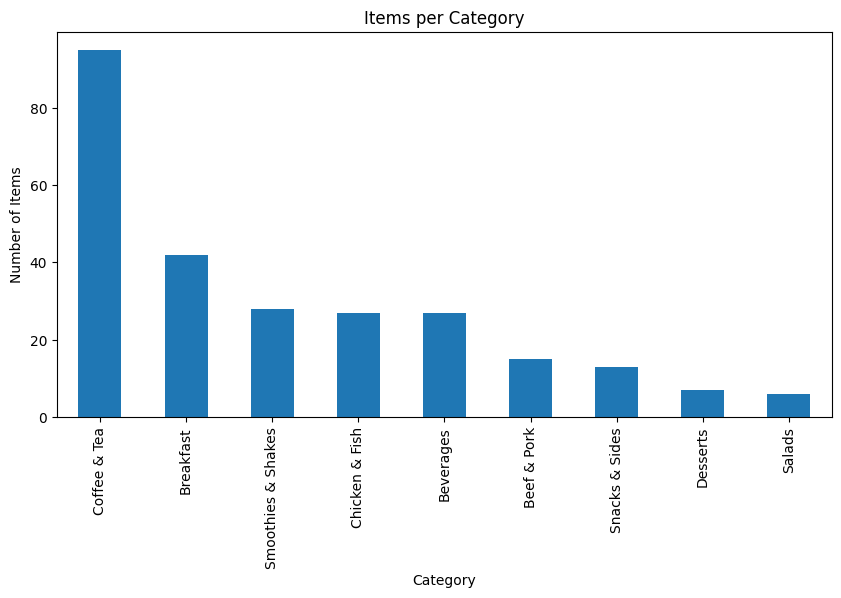

In [64]:
# Count of items per category
df.Category.value_counts().plot(kind='bar', figsize=(10,5), title='Items per Category')
plt.xlabel('Category')
plt.ylabel('Number of Items')
plt.show()

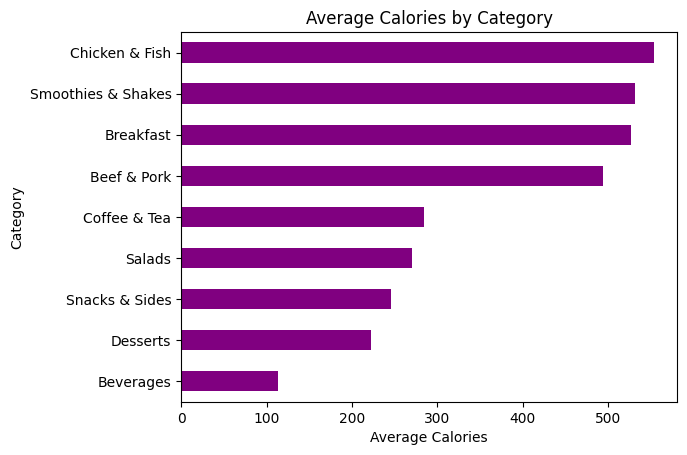

In [65]:
# Average calories per category
df.groupby('Category')['Calories'].mean().sort_values().plot(kind='barh', color='purple', title='Average Calories by Category')
plt.xlabel('Average Calories')
plt.ylabel('Category')
plt.show()

Step 5: Nutritional Correlation

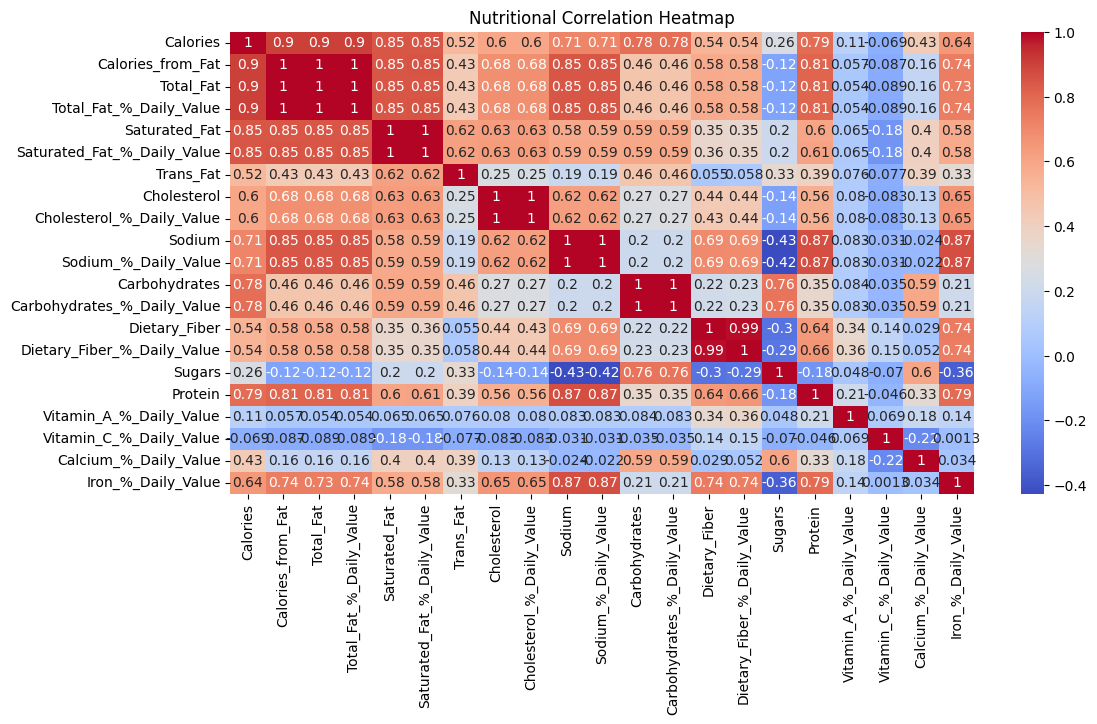

In [66]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Nutritional Correlation Heatmap')
plt.show()

Step 6: High/Low Calorie Items

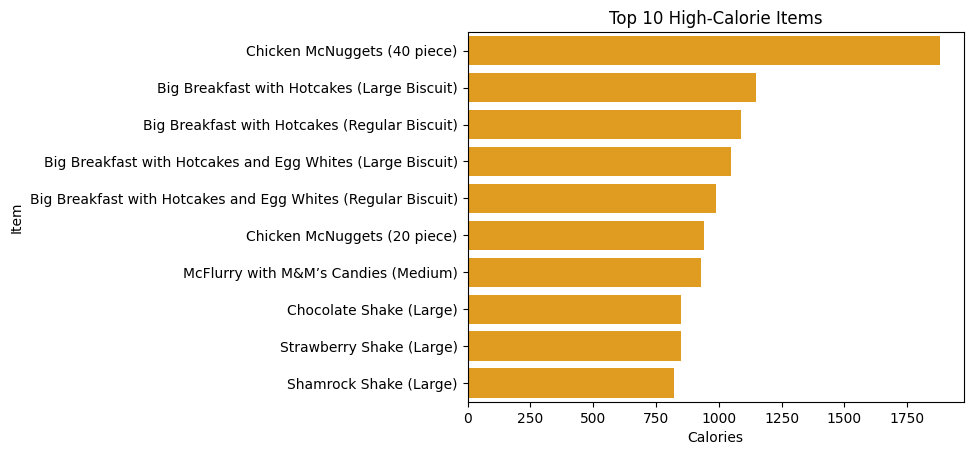

In [67]:
# Top 10 high-calorie items
top_cal = df.sort_values(by='Calories', ascending=False).head(10)
sns.barplot(x='Calories', y='Item', data=top_cal, color='orange')
plt.title('Top 10 High-Calorie Items')
plt.show()

Step 7: Sugar & Fat Analysis

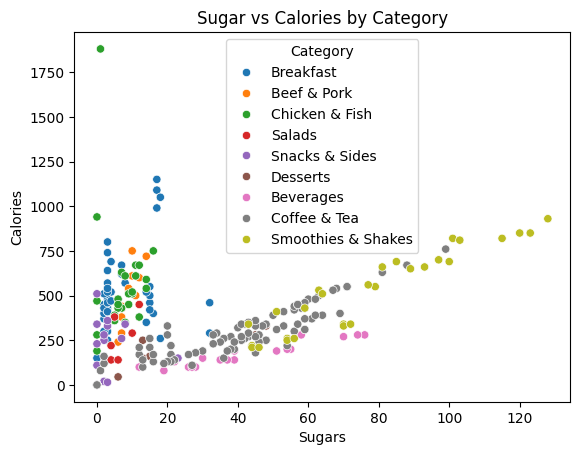

In [68]:
# Sugar vs Calories
sns.scatterplot(x='Sugars', y='Calories', hue='Category', data=df)
plt.title('Sugar vs Calories by Category')
plt.show()

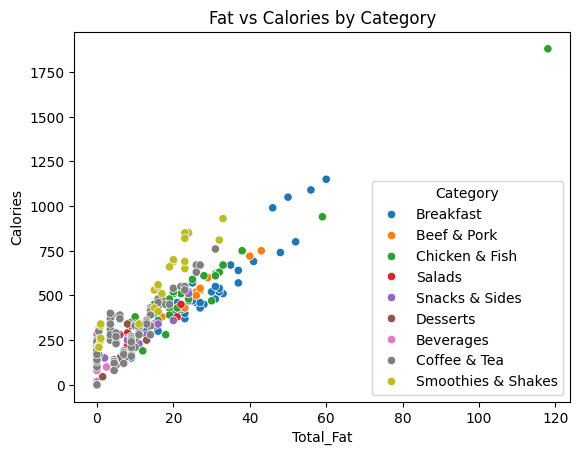

In [69]:
# Fat vs Calories
sns.scatterplot(x='Total_Fat', y='Calories', hue='Category', data=df)
plt.title('Fat vs Calories by Category')
plt.show()

Step 8: Serving Size vs Calories

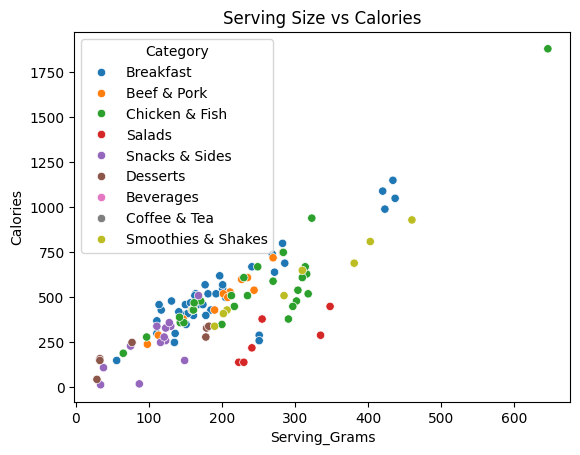

In [70]:
# Extract grams from serving size
df['Serving_Grams'] = df['Serving_Size'].str.extract(r'(\d+)\s*g').astype(float)

# Plot
sns.scatterplot(x='Serving_Grams', y='Calories', hue='Category', data=df)
plt.title('Serving Size vs Calories')
plt.show()

Step 9: Visualizations

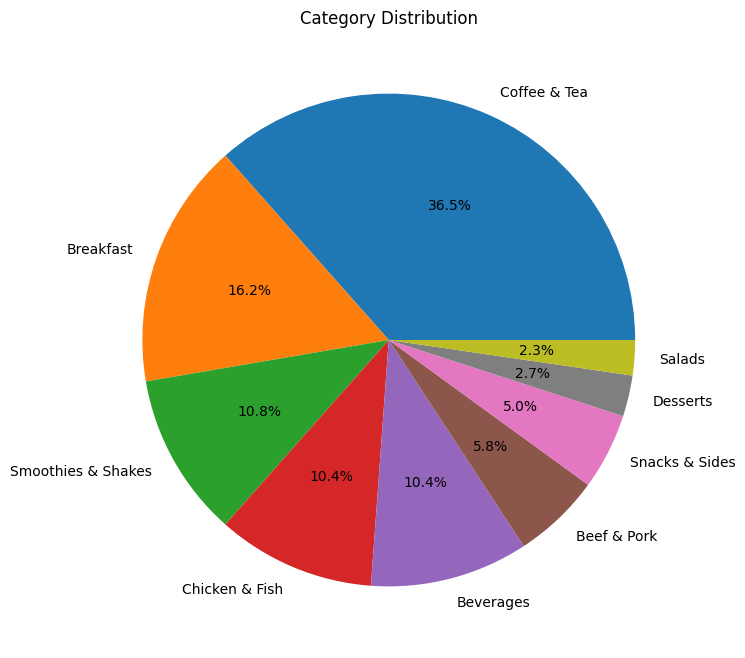

In [71]:
# Category Distribution
df.Category.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8,8))
plt.title('Category Distribution')
plt.ylabel('')
plt.show()

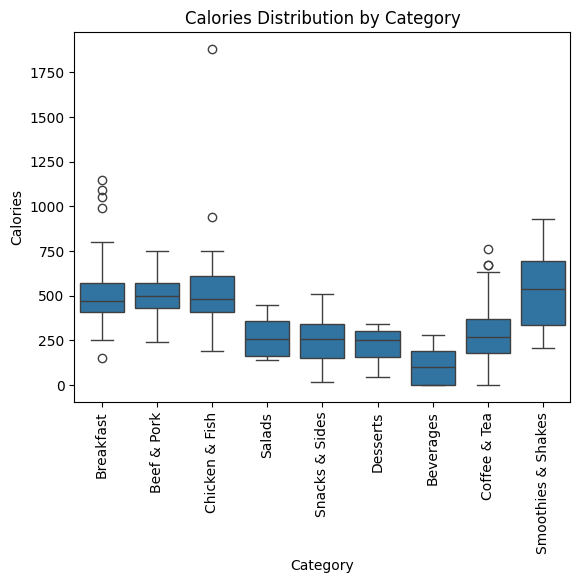

In [72]:
# Calories by category
sns.boxplot(x='Category', y='Calories', data=df)
plt.xticks(rotation=90)
plt.title('Calories Distribution by Category')
plt.show()

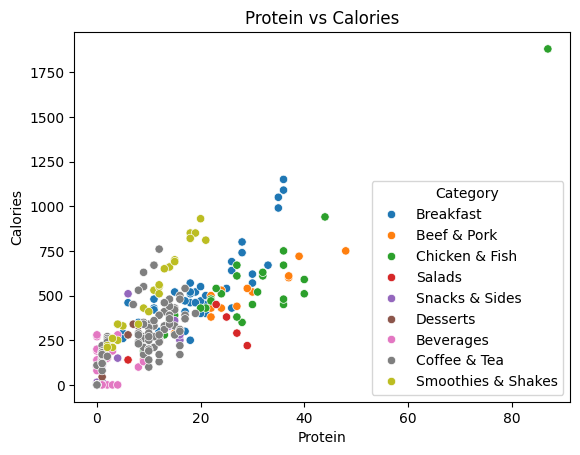

In [73]:
# Protein vs Calories
sns.scatterplot(x='Protein', y='Calories', hue='Category', data=df)
plt.title('Protein vs Calories')
plt.show()

**Recommendations-:**
* Promote low-calorie items like salads and beverages
* Add health warnings for sugar-heavy items
* Optimize serving sizes for calorie control
* Highlight high-protein items for fitness-conscious customers

**Final Summary**

This project explored McDonald's menu data using Python and EDA techniques. The dataset included nutritional details for over 200 items across categories like Breakfast, Chicken, Beverages, and Desserts.

Key steps included:
- Data cleaning and formatting
- Descriptive statistics and category-wise analysis
- Nutritional correlation heatmap
- Sugar vs Calories and Serving Size impact
- Visualizations using Seaborn and Matplotlib

Insights revealed that:
- Breakfast and Chicken items dominate
- Smoothies & Shakes are sugar-heavy
- Salads and Beverages are healthiest
- Serving size influences calorie count

This project demonstrates strong EDA skills, visualization techniques, and actionable insights — ideal for showcasing in a portfolio or internship report.
